confusion matrix
[[111   0]
 [  0  89]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00        89

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

accuracy : 1.0


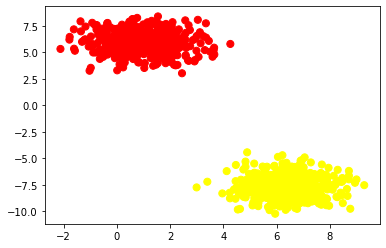

In [42]:
import matplotlib,sys
import random
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib import pyplot as plt

X,y=make_blobs(n_samples=1000,n_features=2,centers=2,random_state=39)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)




df= pd.DataFrame(X, columns=['x','y'])
df.to_csv(r'dataset.csv', index=False,header=True) 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print("confusion matrix")
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
from sklearn.metrics import accuracy_score
f=accuracy_score(y_test, predictions)

print("accuracy :",f)




In [43]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

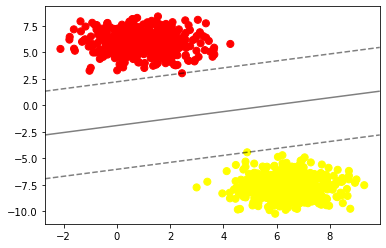

In [44]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [45]:
model.support_vectors_


array([[ 2.44668461,  3.02157719],
       [ 4.89243685, -4.42977625]])

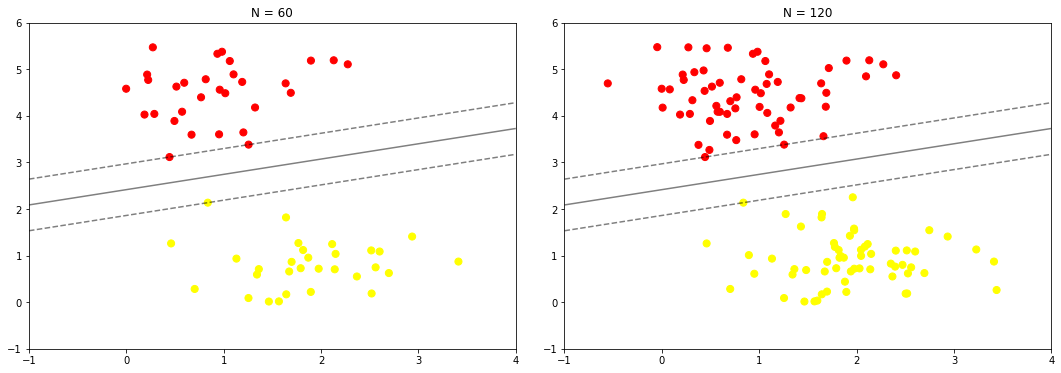

In [48]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))
    
    #This shows that even if the datapoints apart from the support vectors are changed
#you will not see any change in the boundary margin